In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [4]:
data = np.load("origin-data/data.npz")
X = data['X']
y = data['y']

0.9116707529280847


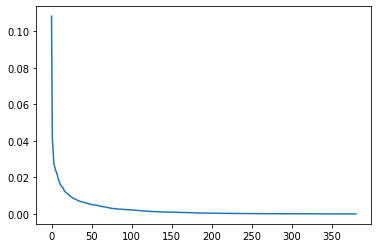

In [14]:
pca = PCA()
Xhat = pca.fit(X).transform(X)
plt.plot(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_[:120]))

In [15]:
pipe = Pipeline([("pca", PCA()),
                 ("knn", KNeighborsClassifier())])

pipe_grid = {"knn__n_neighbors": [6],
             "pca__n_components": [120]}

pipe_gs = GridSearchCV(pipe, pipe_grid, cv=2, verbose=2).fit(X, y)

print(pipe_gs.best_params_, pipe_gs.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] knn__n_neighbors=6, pca__n_components=120 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ knn__n_neighbors=6, pca__n_components=120, total= 3.3min
[CV] knn__n_neighbors=6, pca__n_components=120 .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV] ........ knn__n_neighbors=6, pca__n_components=120, total= 3.3min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.6min finished


{'knn__n_neighbors': 6, 'pca__n_components': 120} 0.7621685723388438
